# Donor Choose : Decision Trees

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('cleandonor4.csv')

donor.head(2)

teacher_prefix school_state  teacher_number_of_previously_posted_projects  \
0           Mrs.           IN                                             0   
1            Mr.           FL                                             7   

   project_is_approved              clean_categories  \
0                    0             Literacy-Language   
1                    1  History-Civics Health-Sports   

              clean_subcategory  \
0                  ESL Literacy   
1  Civics-Government TeamSports   

                                          cleanEssay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

  cleanProjectGradeCategory                                     project_title  
0                  PreK-Two  Educational Support for English Learners at Home  
1                 Six-Eight             Wanted: Projector for Hungry Learners

In [3]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 45851.91it/s]


In [5]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

### Handling Missing data

In [6]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

Empty DataFrame
Columns: [teacher_prefix, school_state, teacher_number_of_previously_posted_projects, project_is_approved, clean_categories, clean_subcategory, cleanEssay, price, quantity, cleanProjectGradeCategory, cleanTitle]
Index: []

In [7]:
donor = donor[0 : 50000]

In [8]:
donor.shape

(50000, 11)

In [9]:
Y = donor['project_is_approved']

In [10]:
donor.drop(['project_is_approved'], axis = 1, inplace = True)

In [11]:
X = donor

## Splitting data

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [13]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 10)
(11055, 10)
(16500, 10)
(22445,)
(11055,)
(16500,)


## Creating data matrix

### Essay BOW

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

BOWvect = CountVectorizer( min_df = 15 )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# max_features : build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

BOWvect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = BOWvect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = BOWvect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = BOWvect.transform( xtest['cleanEssay'].values )

In [15]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(22445, 7389)
(11055, 7389)
(16500, 7389)


### Essay TFIDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df = 15 )
tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(22445, 7389)
(11055, 7389)
(16500, 7389)


### Essay Word 2 vec

In [17]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [18]:
import gensim

In [19]:
xtrw = stow( xtrain['cleanEssay'] ) # List of words for xtrain

print( len( xtrw ) )

xtrmodel = gensim.models.Word2Vec( xtrw, min_count = 15, size = 50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed
# workers: If you hav a multi cores you can set it to 4 for performence

xtrwords = list( xtrmodel.wv.vocab )
len( xtrwords )

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:05<00:00, 4439.34it/s]


22445


6519

In [20]:
# For Cross validation

xcvw = stow( xcv['cleanEssay'] )

print( len( xcvw ) )

xcvmodel = gensim.models.Word2Vec( xcvw, min_count = 15, size =50, workers = 4 )

xcvwords = list( xcvmodel.wv.vocab )
len( xcvwords )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:03<00:00, 2997.60it/s]


11055


4673

In [21]:
# For Test

xtew = stow( xtest['cleanEssay'] )

print( len( xtew ) )

xtemodel = gensim.models.Word2Vec( xtew, min_count = 15, size =50, workers = 4 )

xtewords = list( xtemodel.wv.vocab )
len( xtewords )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:04<00:00, 3879.87it/s]


16500


5737

### Essay Avg Word 2 vec

In [22]:
import numpy as np


def avgw2v( data, words, model ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(50)
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = model.wv[ w ]  # Computing word 2 vec
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [23]:
# For Train
xtrAW2V = np.asarray( avgw2v( xtrw, xtrwords, xtrmodel ) )

xtrAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:44<00:00, 214.89it/s]


(22445, 50)

In [24]:
xcvAW2V = np.asarray( avgw2v( xcvw, xtrwords, xtrmodel ) )

xcvAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:46<00:00, 238.38it/s]


(11055, 50)

In [25]:
xteAW2V = np.asarray( avgw2v( xtew, xtrwords, xtrmodel ) )

xteAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:28<00:00, 185.66it/s]


(16500, 50)

### Essay TFIDF WW2V

In [26]:
print( tfidfvect.get_feature_names()[1000:1020] )
len( tfidfvect.get_feature_names() )

['caddies', 'cafe', 'cafeteria', 'calculate', 'calculating', 'calculations', 'calculator', 'calculators', 'calculus', 'calendar', 'california', 'call', 'called', 'calling', 'calls', 'calm', 'calming', 'calories', 'camden', 'came']


7389

In [27]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

In [28]:
def ww2v( data, model, TFIDF, feat = essayFeatures ):
    
    essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
    row = 0

    for sent in tqdm( data ):
        sv = np.zeros( 50 )  # as word vectors are of zero length
        ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review

        for w in sent:      

            try:
                vec = model.wv[ w ]
                tfidf = TFIDF[ row, feat.index( w ) ]

                sv += ( vec * tfidf )
                ws += tfidf

            except:
                pass

        if ws != 0:
            sv /= ws
        essayWw2v.append( sv )
        row += 1

    return essayWw2v

In [29]:
# For train
xtrWW2V = np.asarray( ww2v( xtrw, xtrmodel, xtrEssayTFIDF ) )

xtrWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 22445/22445 [13:06<00:00, 28.55it/s]


(22445, 50)

In [30]:
xcvWW2V = np.asarray( ww2v( xcvw, xtrmodel, xcvEssayTFIDF ) )

xcvWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 11055/11055 [05:56<00:00, 30.98it/s]


(11055, 50)

In [31]:
xteWW2V = np.asarray( ww2v( xtew, xtrmodel, xteEssayTFIDF ) )

xteWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 16500/16500 [08:32<00:00, 32.19it/s]


(16500, 50)

### Project Title BOW

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 15 )

vect.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vect.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vect.transform( xcv['cleanTitle'].values )
xteTitleBOW = vect.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(22445, 848)
(11055, 848)
(16500, 848)


### Project title TFIDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Titletfidfvect = TfidfVectorizer( min_df=15 )
Titletfidfvect.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = Titletfidfvect.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = Titletfidfvect.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = Titletfidfvect.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(22445, 848)
(11055, 848)
(16500, 848)


### Project Title Word 2 Vec

In [34]:
# For Train

xtrTitlew = stow( xtrain['cleanTitle'] )  # stow : is a defined by me that coverts a list of sentences to words

print( len( xtrTitlew ) )

xtrTitlemodel = gensim.models.Word2Vec( xtrTitlew, min_count = 15, size =50, workers = 4 )

xtrTitlewords = list( xtrTitlemodel.wv.vocab )
len( xtrTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 346051.20it/s]


22445


688

In [35]:
# For Cross Validation

xcvTitlew = stow( xcv['cleanTitle'] )

print( len( xcvTitlew ) )

xcvTitlemodel = gensim.models.Word2Vec( xcvTitlew, min_count = 15, size =50, workers = 4 )

xcvTitlewords = list( xcvTitlemodel.wv.vocab )
len( xcvTitlewords )

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 21185.72it/s]


11055


368

In [36]:
# For Test

xteTitlew = stow( xtest['cleanTitle'] )

print( len( xteTitlew ) )

xteTitlemodel = gensim.models.Word2Vec( xteTitlew, min_count = 15, size =50, workers = 4 )

xteTitlewords = list( xteTitlemodel.wv.vocab )
len( xteTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 393923.27it/s]


16500


544

### Project title Avg Word 2 vec

In [37]:
# For Train

xtrTitleAW2V = np.asarray( avgw2v( xtrTitlew, xtrTitlewords, xtrTitlemodel ) )

xtrTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 34774.97it/s]


(22445, 50)

In [38]:
# For Cross validation

xcvTitleAW2V = np.asarray( avgw2v( xcvTitlew, xtrTitlewords, xtrTitlemodel ) )

xcvTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 36197.76it/s]


(11055, 50)

In [39]:
# For Test

xteTitleAW2V = np.asarray( avgw2v( xteTitlew, xtrTitlewords, xtrTitlemodel ) )

xteTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 38583.54it/s]


(16500, 50)

### Project title TFIDF WW2V

In [40]:
print( tfidfvect.get_feature_names()[0:30] )
len( tfidfvect.get_feature_names() )

['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14', '140', '15', '150', '16', '160', '17', '18', '180', '19', '1st', '20', '200', '2000']


7389

In [41]:
titlefeatures = tfidfvect.get_feature_names()

In [42]:
# For train
xtrTitleWW2V = np.asarray( ww2v( xtrTitlew, xtrTitlemodel, xtrTitleTFIDF, titlefeatures ) )

xtrTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:04<00:00, 4846.49it/s]


(22445, 50)

In [43]:
# For Cross validation
xcvTitleWW2V = np.asarray( ww2v( xcvTitlew, xtrTitlemodel, xcvTitleTFIDF, titlefeatures ) )

xcvTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:02<00:00, 4924.64it/s]


(11055, 50)

In [44]:
# For Test
xteTitleWW2V = np.asarray( ww2v( xteTitlew, xtrTitlemodel, xteTitleTFIDF, titlefeatures ) )

xteTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:03<00:00, 4879.79it/s]


(16500, 50)

### State

In [45]:
vectState = CountVectorizer()

vectState.fit( xtrain['school_state'].values )

xtrState = vectState.transform( xtrain['school_state'].values )
xcvState = vectState.transform( xcv['school_state'].values )
xteState = vectState.transform( xtest['school_state'].values )

print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


In [46]:
print( vectState.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher Prefix

In [47]:
vectPrefix = CountVectorizer( vocabulary = ['dr', 'mr', 'mrs', 'ms', 'teacher'] )

vectPrefix.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectPrefix.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectPrefix.transform( xcv['teacher_prefix'].values )
xtePrefix = vectPrefix.transform( xtest['teacher_prefix'].values )

print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 5)
(11055, 5)
(16500, 5)


In [48]:
print( vectPrefix.get_feature_names() )

['dr', 'mr', 'mrs', 'ms', 'teacher']


### Category

In [49]:
vectCat = CountVectorizer()

vectCat.fit( xtrain['clean_categories'].values )

xtrCat = vectCat.transform( xtrain['clean_categories'].values )
xcvCat = vectCat.transform( xcv['clean_categories'].values )
xteCat = vectCat.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


In [50]:
print( vectCat.get_feature_names() )

['appliedlearning', 'arts', 'care', 'civics', 'health', 'history', 'hunger', 'language', 'literacy', 'math', 'music', 'science', 'specialneeds', 'sports', 'warmth']


### Sub Category

In [51]:
vectSubCat = CountVectorizer()

vectSubCat.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectSubCat.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectSubCat.transform( xcv['clean_subcategory'].values )
xteSubCat = vectSubCat.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


In [52]:
print( vectSubCat.get_feature_names() )

['appliedsciences', 'care', 'careerprep', 'charactereducation', 'civics', 'college', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'fitness', 'foreignlanguages', 'geography', 'government', 'gym', 'health', 'history', 'hunger', 'lifescience', 'literacy', 'literature', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth', 'wellness', 'writing']


### Project Grade Category

In [53]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### Price

In [54]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Previously Posted projects

In [55]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Quantity

In [56]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrQuan.shape )
print( xcvQuan.shape )
print( xteQuan.shape )

(22445, 1)
(11055, 1)
(16500, 1)


## Merging Features to create different sets

### Set 1

In [57]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 8356) (22445,)
(11055, 8356) (11055,)
(16500, 8356) (16500,)


### Set 2

In [58]:
from scipy.sparse import hstack

xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(22445, 8356) (22445,)
(11055, 8356) (11055,)
(16500, 8356) (16500,)


### Set 3

In [59]:
from scipy.sparse import hstack

xtr3 = hstack(( xtrAW2V, xtrTitleAW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrPrice, xtrQuan, xtrPrev )).tocsr()
xcv3 = hstack(( xcvAW2V, xcvTitleAW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvPrice, xcvQuan, xcvPrev )).tocsr()
xte3 = hstack(( xteAW2V, xteTitleAW2V, xteState, xtePrefix, xteCat, xteSubCat, xtePrice, xteQuan, xtePrev )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 8356) (22445,)
(11055, 8356) (11055,)
(16500, 8356) (16500,)


### Set 4

In [60]:
from scipy.sparse import hstack

xtr4 = hstack(( xtrWW2V, xtrTitleWW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv4 = hstack(( xcvWW2V, xcvTitleWW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte4 = hstack(( xteWW2V, xteTitleWW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr4.shape, ytrain.shape )
print( xcv4.shape, ycv.shape )
print( xte4.shape, ytest.shape )

(22445, 219) (22445,)
(11055, 219) (11055,)
(16500, 219) (16500,)


## Functions

In [72]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

import seaborn as sn

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Function to plot Error 

In [62]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [69]:
def BestDS( xtr, xcv, ytr, ycv ):
    
    depth = [ 1, 5, 10, 50, 100, 500 ] 
    split = [5, 10, 100, 500]

    trAUC = []
    cvAUC = []
    
    d = []
    s = []

    print(' '*5,'- First -', ' '*9,'- Second -', ' '*9,'- Third -', ' '*9,'- Fourth -', ' '*9,'- Fifth -', ' '*9,'- Sixth -')
   
    for i in depth :
        for j in split :
            
            clf = DecisionTreeClassifier( max_depth = i, min_samples_split = j )
            clf.fit(xtr, ytr)

            ytrPred = batchPredict( xtr, clf )    
            ycvPred = batchPredict( xcv, clf )

            # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
            # not the predicted outputs 

            trAUC.append( roc_auc_score( ytr, ytrPred ))
            cvAUC.append( roc_auc_score( ycv, ycvPred ))
            
            d.append(i)
            s.append(j)

        print('#'*20, end =' ' )

    a = [ i for i in range(1,25) ]  
    # Here 1 = depth=1 & split=5  2 = depth=1 & split=10
    plt.figure( figsize = ( 15, 5 ) )
    
    plt.plot( a, trAUC, label = 'Train AUC')
    plt.plot( a, cvAUC, label = 'CV AUC')

    plt.scatter( a, trAUC, label = 'Train AUC points')
    plt.scatter( a, cvAUC, label = 'CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()
    plt.close()
    
    # 3D Plot
    trace1 = go.Scatter3d( x = d, y = s, z = trAUC, name = 'Train')
    trace2 = go.Scatter3d( x = d, y = s, z = cvAUC, name = 'Cross validation')

    data = [trace1, trace2]

    layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='split'),
        zaxis = dict(title='AUC'),))

    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')
    
    
    '''
    c = 1
    for i in depth:
        for j in split:
            print(c, ' in X axis means  depth = ', i, ' & split = ', j )
            c += 1
    '''

### Function to Calculate FP pts and Calculating AUC

In [64]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low
    # argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [65]:
def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmtr,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test Set ", sno)
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmte,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()
    
    
    return predicted

### Function to plot the roc curve  and accuracy

In [66]:
def roc( xtr, xte, ytr, yte, D, S, sno ):
    
    clf = DecisionTreeClassifier( max_depth = D, min_samples_split = S )
    clf.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, clf )    
    yTestPred = batchPredict( xte, clf )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel("maxdepth : hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    pred = cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )
    
    return pred

### Function to find the best parameters using GridSearchCV() bruteforce

def BestDS(xtr, ytr):

    tuned_parameters = [{'max_depth': [ 1, 5, 10, 50, 100, 500 ], 'min_samples_split': [ 5, 10, 100, 500]}]


    clf = GridSearchCV( DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='roc_auc', n_jobs = -1)
    clf.fit(xtr, ytr)

    print("Best parameters :")
    print()

    print( clf.best_params_ )
    print()

    print("Grid scores :")
    print()

    means = clf.cv_results_['mean_test_score']

    stds = clf.cv_results_['std_test_score']

    for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):

        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    print()

 Ref : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [78]:
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt


import plotly.offline as offline

plotly.offline.init_notebook_mode( connected=True )

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

# Ref : https://plot.ly/python/

In [70]:
import warnings
warnings.filterwarnings("ignore")

## Operations on Set 1

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

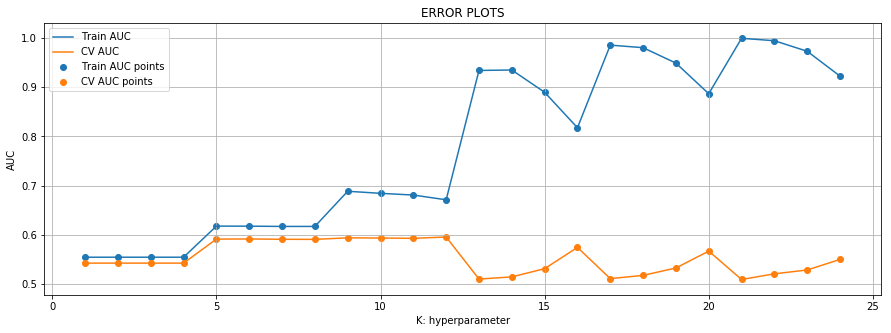

In [79]:
BestDS( xtr1, xcv1, ytrain, ycv )

# depth = [ 1, 5, 10, 50, 100, 500 ] 
# split = [5, 10, 100, 500]

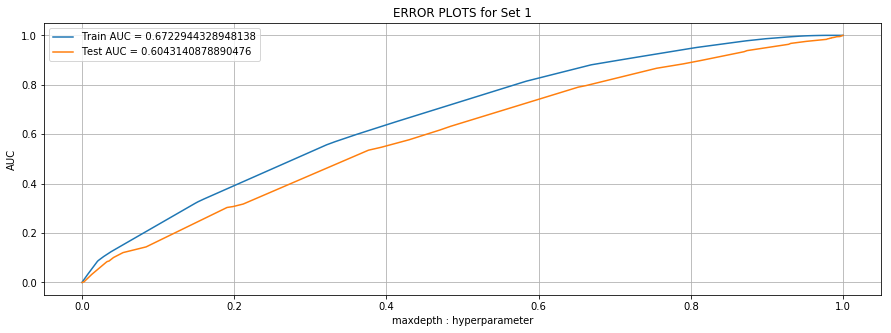

Confusion Matrix for Train of Set  1
 The maximum value of tpr*(1-fpr) =  0.3830477209696327  for threshold =  0.844
[[ 2080  1383]
 [ 6884 12098]]


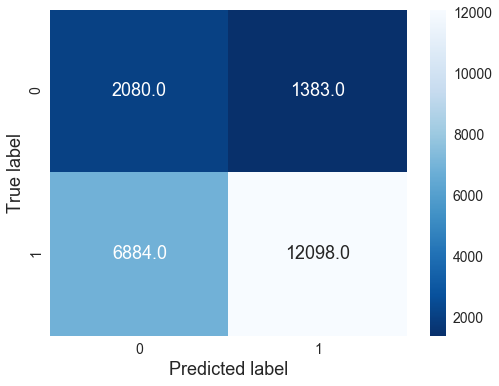



Confusion Matrix for Test Set  1
 The maximum value of tpr*(1-fpr) =  0.3338087291866069  for threshold =  0.851
[[1452 1094]
 [5897 8057]]


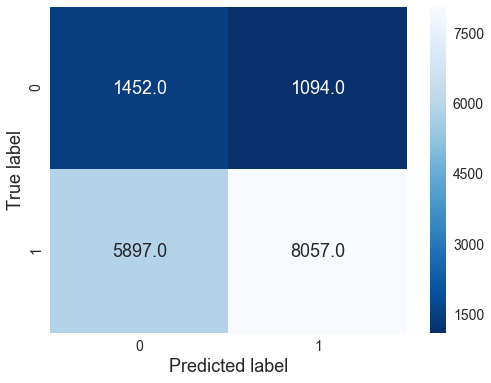

In [83]:
bestD = 10
bestS = 500

pred = roc( xtr1, xte1, ytrain, ytest, bestD, bestS, 1 )

### Operations with FP points

In [71]:
print( len( pred ) )
yte = list( ytest )
len( yte )

16500


16500

In [72]:
# Claculating indexes of False Positive points
ind = []
for i in range( 0, 330 ):
    
    if pred[i] == 0 and yte[i] == 1:
        
        ind.append(i)

In [73]:
print( ind )
len( ind )

[2, 4, 8, 9, 13, 14, 16, 18, 19, 20, 24, 25, 30, 33, 35, 39, 45, 48, 49, 51, 52, 62, 70, 71, 75, 76, 78, 86, 88, 99, 100, 101, 102, 103, 106, 109, 111, 113, 118, 121, 125, 126, 128, 132, 138, 141, 143, 144, 146, 153, 156, 157, 159, 166, 169, 172, 173, 175, 177, 179, 181, 185, 187, 188, 192, 194, 202, 204, 207, 208, 215, 217, 219, 220, 224, 227, 229, 236, 237, 242, 243, 244, 245, 252, 261, 262, 263, 266, 269, 272, 273, 274, 275, 276, 278, 280, 281, 286, 287, 290, 291, 292, 298, 300, 304, 305, 307, 308, 310, 312, 313, 316, 318, 325, 327]


115

In [74]:
pred[2] == yte[2]

False

In [75]:
price = []

for i in ind:
    price.append( donor['price'][i] )

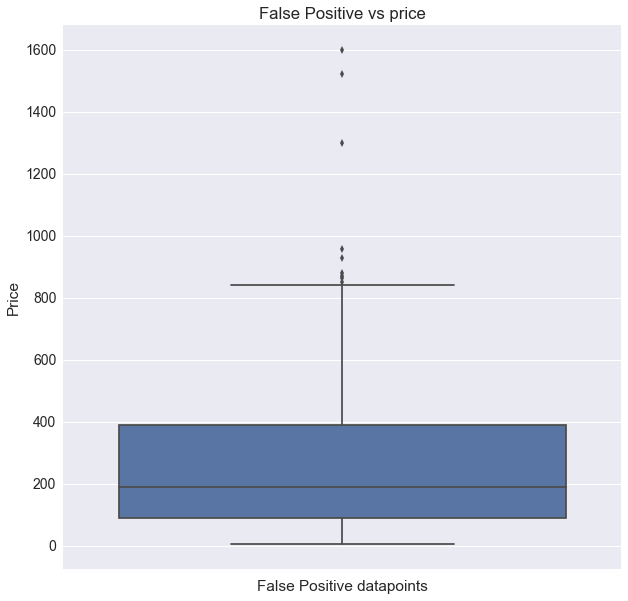

In [76]:
import seaborn as sns

plt.figure( figsize =(10,10) )
#plt.plot( ind, price )
sns.boxplot( y = price )
plt.xlabel('False Positive datapoints')
plt.ylabel('Price')
plt.title('False Positive vs price')
plt.show()

In [77]:
prev = []

for i in ind:
    prev.append( donor['teacher_number_of_previously_posted_projects'][i] )

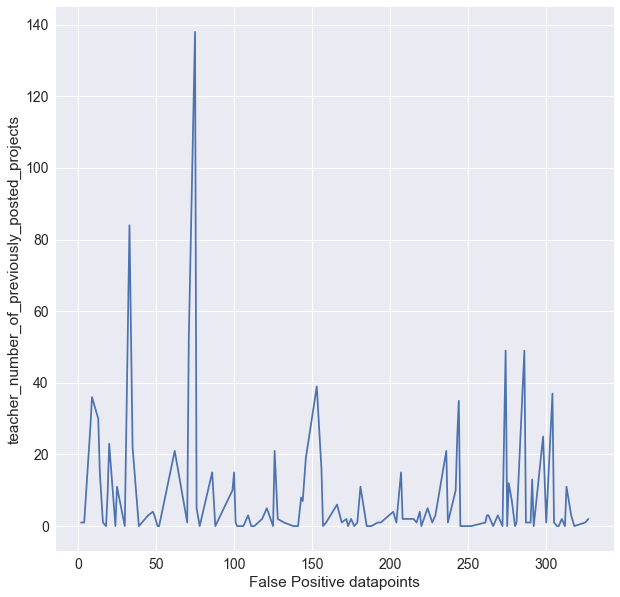

In [78]:
plt.figure( figsize =(10,10) )

plt.plot( ind, prev )

plt.xlabel('False Positive datapoints')
plt.ylabel('teacher_number_of_previously_posted_projects')

plt.show()

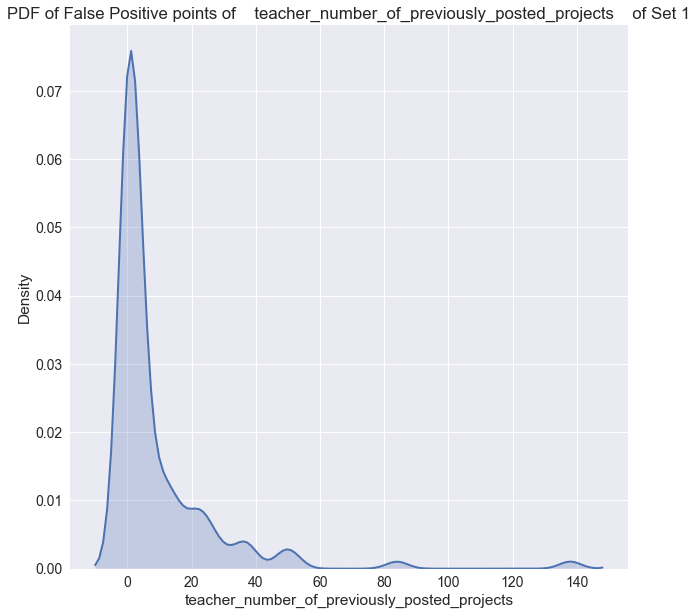

In [79]:
plt.figure( figsize =(10,10) )

sns.distplot( prev, hist = False, kde = True, kde_kws ={ 'linewidth' : 2, 'shade' : True } )

plt.title('PDF of False Positive points of    teacher_number_of_previously_posted_projects    of Set 1')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.show()

### Creating wordcloud of EssayText of FP pts.

In [80]:
essay = ""
for i in ind:
    temp = donor['cleanEssay'][i]
    essay += temp

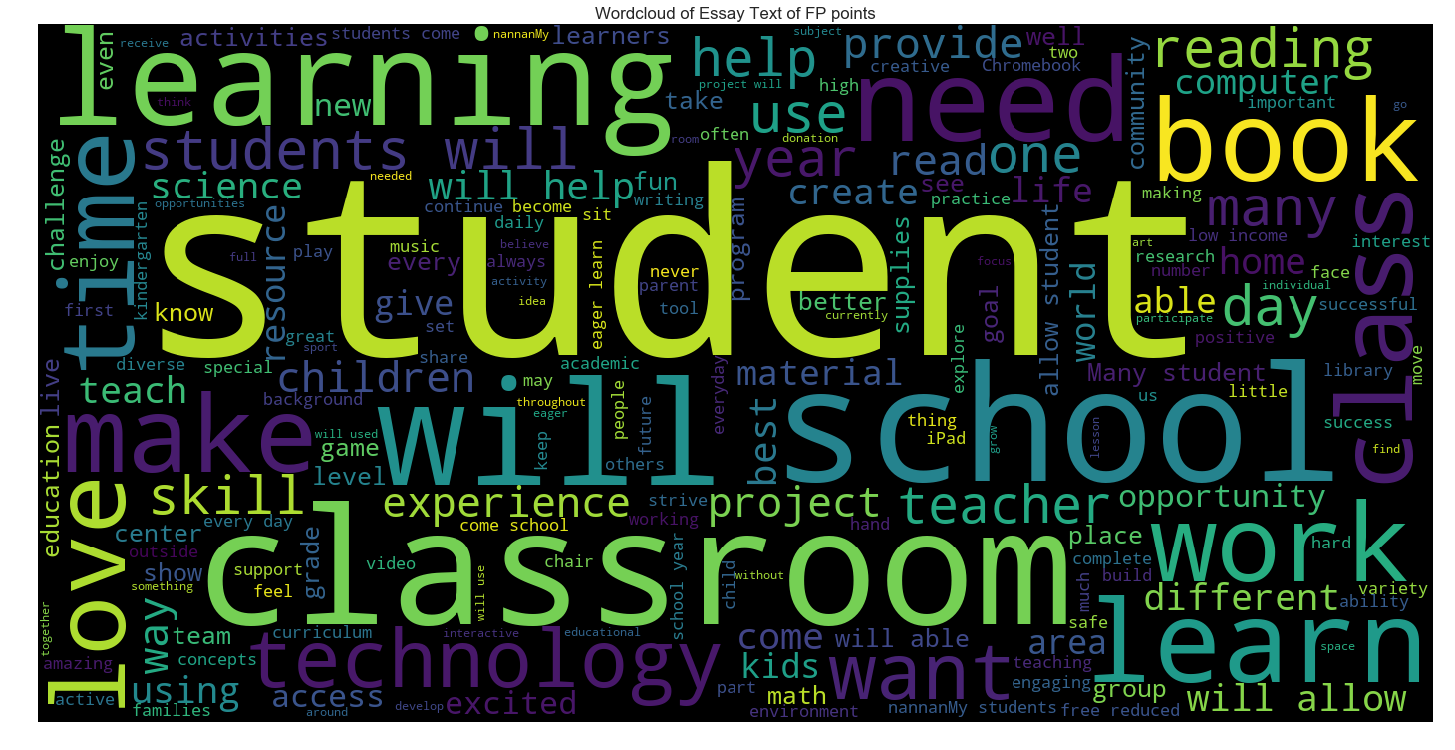

In [84]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color='black', width=1400, height=700 ).generate( essay )

# Display the generated image:
fig = plt.figure( figsize=(25,20) )
plt.imshow( wordcloud )
plt.title('Wordcloud of Essay Text of FP points')
plt.axis('off')
plt.show()

### Storing Feature names for graphviz

In [85]:
x = [ BOWvect, vect, vectState, vectPrefix, vectCat, vectSubCat, vectGCat ]

feat = []

for v in x:
    
    feat += v.get_feature_names()
    
print( feat[0: 100] )

feat.append('teacher_number_of_previously_posted_projects')
feat.append('quantity')
feat.append('price')
len( feat )

['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12', '120', '125', '12th', '13', '130', '14', '140', '15', '150', '16', '160', '17', '18', '180', '19', '1st', '20', '200', '2000', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20th', '21', '21st', '22', '23', '24', '25', '250', '26', '27', '28', '29', '2d', '2nd', '30', '300', '31', '32', '33', '34', '35', '350', '36', '360', '37', '38', '3d', '3doodler', '3rd', '40', '400', '41', '42', '43', '44', '45', '450', '46', '47', '48', '49', '4k', '4th', '50', '500', '504', '51', '52', '53', '54', '55', '550', '56', '57', '58', '5th', '60', '600', '62', '64', '65', '650', '66', '67']


8432

In [86]:
from sklearn import tree
import graphviz 


classifier = tree.DecisionTreeClassifier( max_depth = 3, min_samples_split = 500)
classifier = classifier.fit( xtr1, ytrain )

dot_data = tree.export_graphviz( classifier, out_file=None ) 
graph = graphviz.Source( dot_data ) 
graph.render("xtr1") 

'xtr1.pdf'

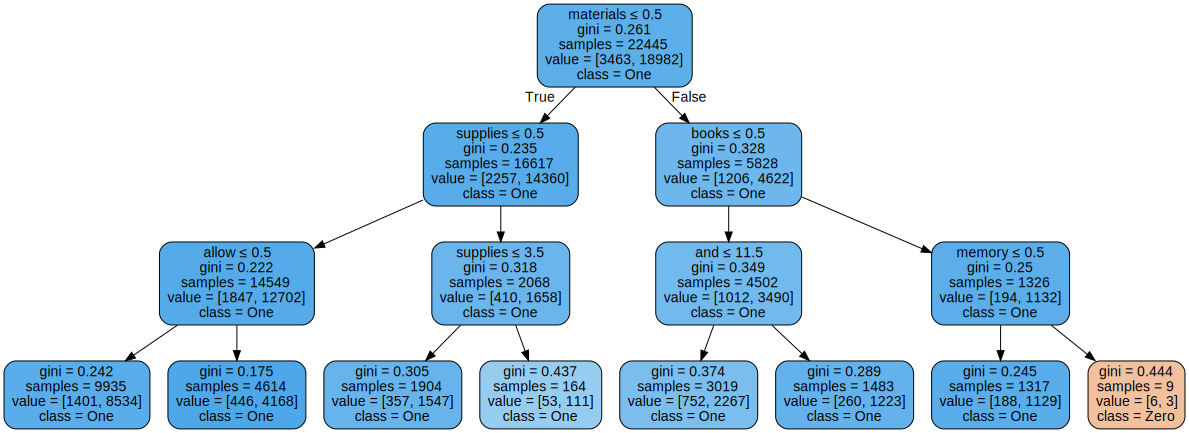

In [87]:

dot_data = tree.export_graphviz( classifier, out_file=None, feature_names = feat ,  class_names=['Zero', 'One'],
                                filled=True, rounded=True,  special_characters=True )  

# feature_names : All feature names in the dataset provided i,e; xtr1 here ( BOW ) 
# class_names : Must be str not int ( these are label names )
graph = graphviz.Source(dot_data)  

graph 

## Operations on Set 2

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

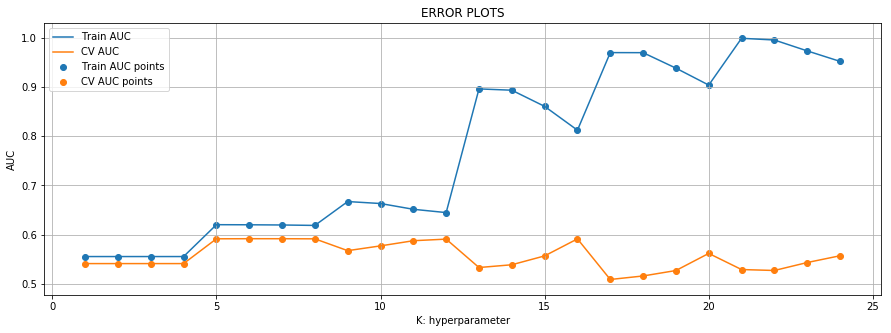

In [80]:
BestDS( xtr2, xcv2, ytrain, ycv )

In [85]:
import seaborn as sns

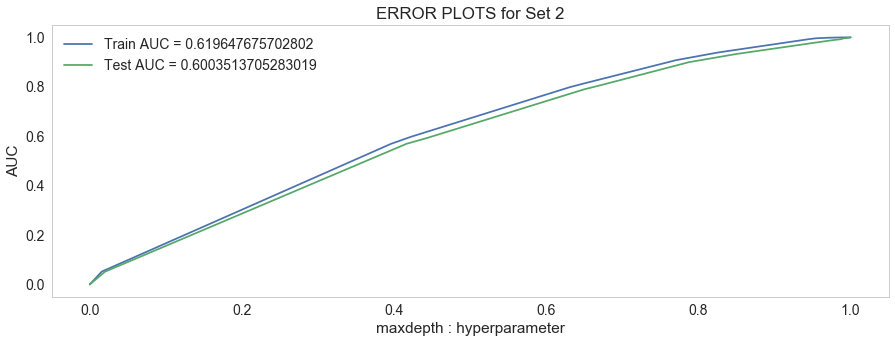

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.34532768448233986  for threshold =  0.882
[[ 2091  1372]
 [ 8173 10809]]


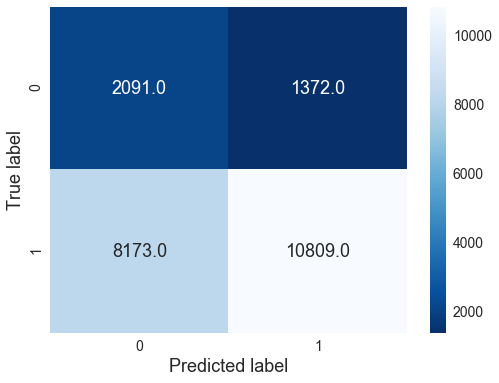



Confusion Matrix for Test Set  2
 The maximum value of tpr*(1-fpr) =  0.33223566693887363  for threshold =  0.856
[[1414 1132]
 [5666 8288]]


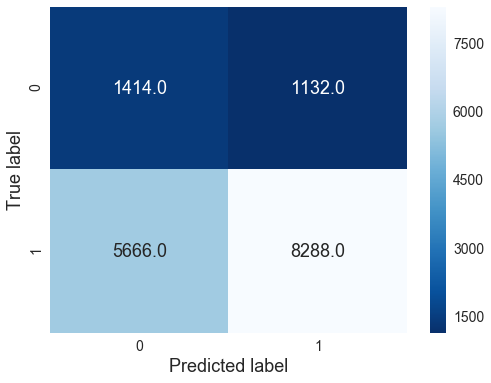

In [86]:
bestD = 5
bestS = 100
sns.set_style('whitegrid')

pred = roc( xtr2, xte2, ytrain, ytest, bestD, bestS, 2 )

### Operations on FP points

In [93]:
print( len( pred ) )

16500


In [94]:
# Claculating indexes of False Positive points
ind = []
for i in range( 0, 330 ):
    
    if pred[i] == 0 and yte[i] == 1:
        
        ind.append(i)

In [95]:
print( ind )
len( ind )

[2, 8, 9, 13, 14, 18, 19, 20, 24, 30, 33, 39, 45, 48, 49, 70, 75, 86, 88, 92, 98, 99, 100, 101, 102, 103, 109, 111, 114, 118, 121, 125, 126, 128, 132, 138, 141, 144, 146, 153, 156, 159, 166, 169, 172, 173, 175, 177, 181, 188, 192, 194, 202, 204, 207, 208, 215, 217, 219, 224, 227, 229, 236, 242, 243, 244, 245, 252, 262, 266, 269, 272, 274, 275, 276, 278, 280, 281, 286, 287, 290, 292, 298, 300, 304, 307, 308, 310, 312, 313, 316, 318, 325, 327]


94

In [96]:
pred[2] == yte[2]

False

In [97]:
price = []

for i in ind:
    price.append( donor['price'][i] )

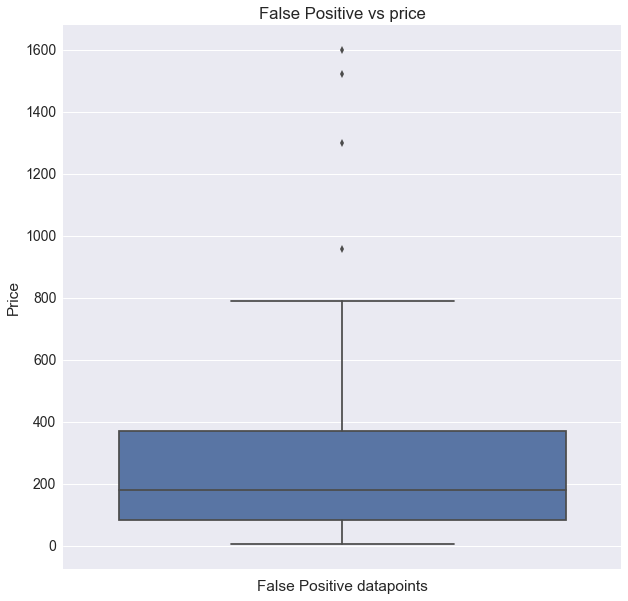

In [98]:
import seaborn as sns

plt.figure( figsize =(10,10) )
#plt.plot( ind, price )
sns.boxplot( y = price )
plt.xlabel('False Positive datapoints')
plt.ylabel('Price')
plt.title('False Positive vs price')
plt.show()

In [99]:
prev = []

for i in ind:
    prev.append( donor['teacher_number_of_previously_posted_projects'][i] )

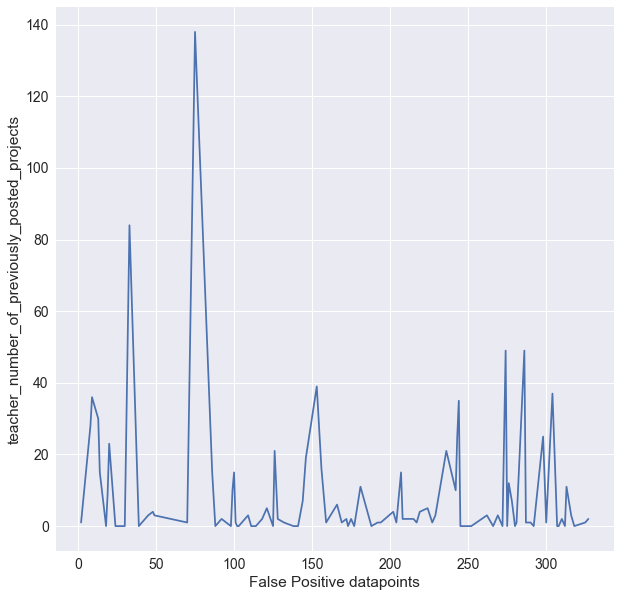

In [100]:
plt.figure( figsize =(10,10) )

plt.plot( ind, prev )

plt.xlabel('False Positive datapoints')
plt.ylabel('teacher_number_of_previously_posted_projects')

plt.show()

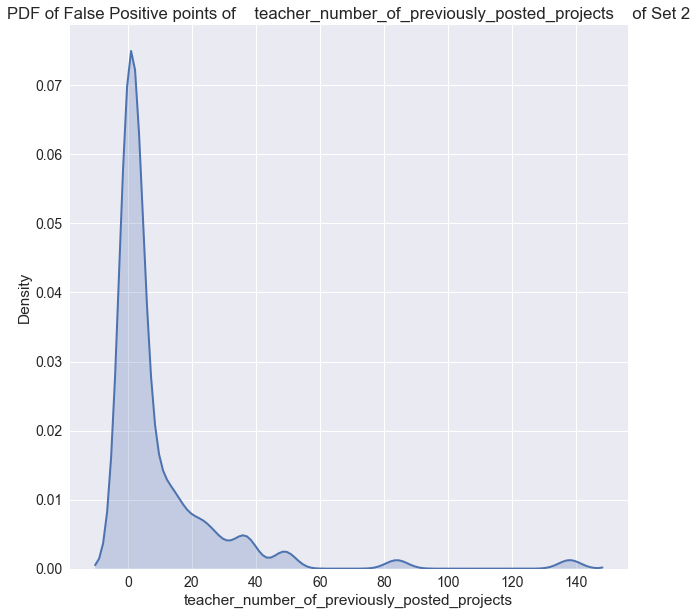

In [101]:
plt.figure( figsize =(10,10) )

sns.distplot( prev, hist = False, kde = True, kde_kws ={ 'linewidth' : 2, 'shade' : True } )

plt.title('PDF of False Positive points of    teacher_number_of_previously_posted_projects    of Set 2')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.show()

### wordcloud for EssayText of FP pts.

In [102]:
essay = ""
for i in ind:
    temp = donor['cleanEssay'][i]
    essay += temp

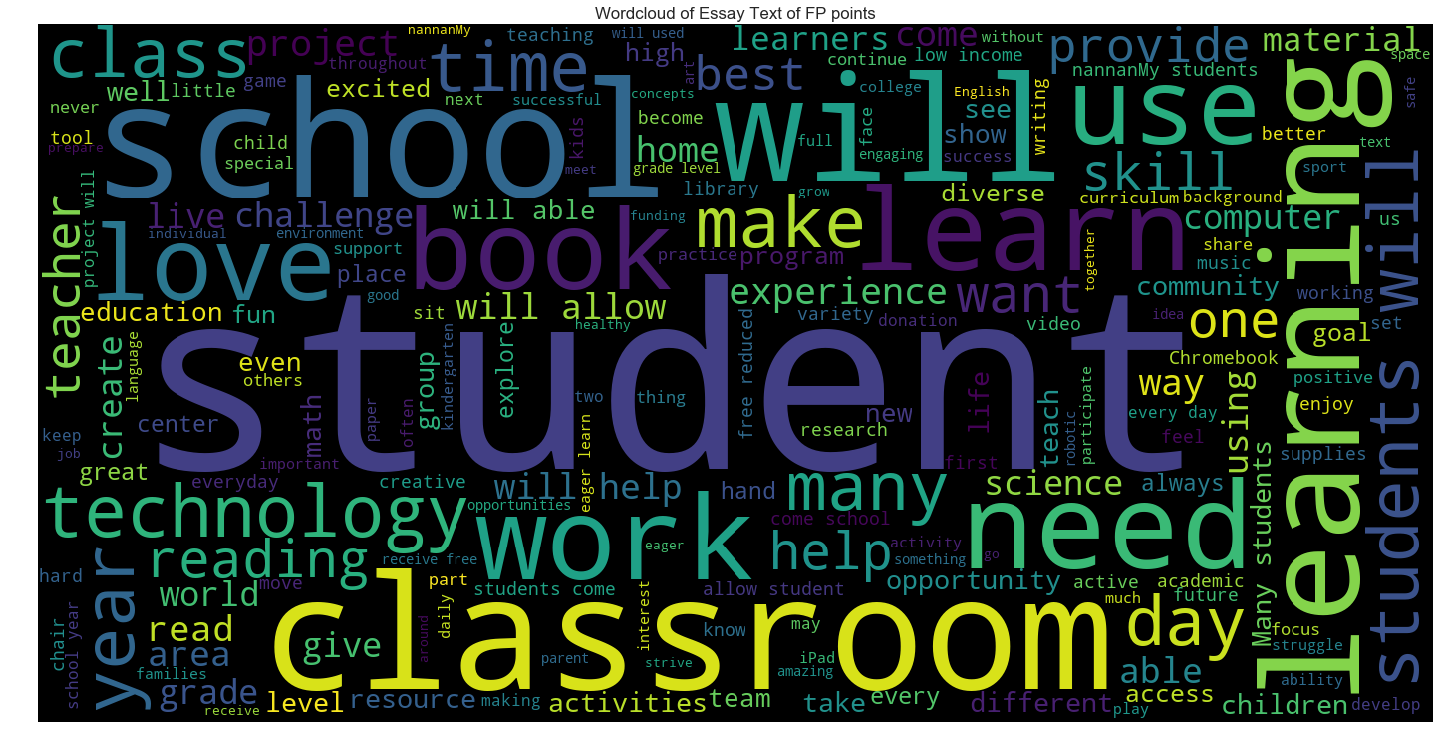

In [103]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color='black', width=1400, height=700 ).generate( essay )

# Display the generated image:
fig = plt.figure( figsize=(25,20) )
plt.imshow( wordcloud )
plt.title('Wordcloud of Essay Text of FP points')
plt.axis('off')
plt.show()


### Storing Feture names for Graphviz

In [104]:
x = [ Titletfidfvect, tfidfvect, vectState, vectPrefix, vectCat, vectSubCat, vectGCat ]

feat = []

for v in x:
    
    feat += v.get_feature_names()
    
print( feat[0: 100] )

feat.append('teacher_number_of_previously_posted_projects')
feat.append('quantity')
feat.append('price')
len( feat )

['16', '1st', '2016', '2017', '21st', '2nd', '3d', '3rd', '4th', '5th', '6th', 'abc', 'academic', 'access', 'achieve', 'achievement', 'action', 'active', 'activities', 'activity', 'add', 'adventure', 'adventures', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all', 'alternative', 'amazing', 'america', 'american', 'and', 'ap', 'apple', 'apples', 'approach', 'apps', 'area', 'around', 'art', 'artists', 'arts', 'aspiring', 'atpe', 'attention', 'audio', 'authors', 'autism', 'away', 'awesome', 'baby', 'back', 'backpacks', 'bags', 'balance', 'balancing', 'ball', 'balls', 'band', 'bands', 'based', 'basic', 'basics', 'basketball', 'bean', 'beat', 'beautiful', 'become', 'becoming', 'begin', 'beginning', 'behavior', 'best', 'better', 'beyond', 'big', 'bilingual', 'bins', 'biology', 'blast', 'blocks', 'board', 'boards', 'bodies', 'body', 'boogie', 'book', 'books', 'boost', 'bounce', 'bouncing', 'bouncy', 'box', 'boxes', 'brain', 'brains', 'break']


8432

In [105]:
classifier = tree.DecisionTreeClassifier( max_depth = 3, min_samples_split = 500)
classifier = classifier.fit( xtr2, ytrain )

dot_data = tree.export_graphviz( classifier, out_file=None ) 
graph = graphviz.Source( dot_data ) 
graph.render("xtr2") 

'xtr2.pdf'

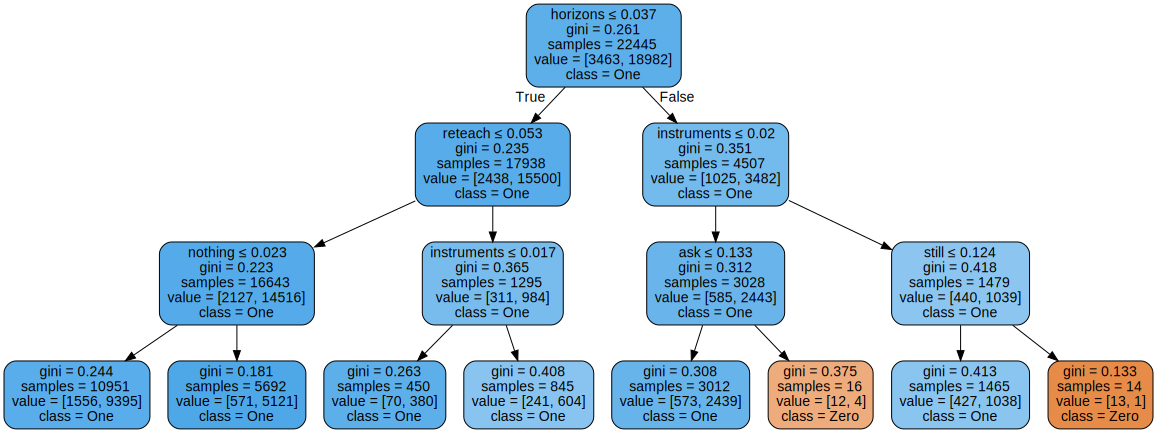

In [106]:
dot_data = tree.export_graphviz( classifier, out_file=None, feature_names = feat ,  class_names=['Zero', 'One'],
                                filled=True, rounded=True,  special_characters=True )  

# feature_names : All feature names in the dataset provided i,e; xtr1 here ( BOW ) 
# class_names : Must be str not int ( these are label names )
graph = graphviz.Source(dot_data)  

graph 

## Operations on Set 3

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

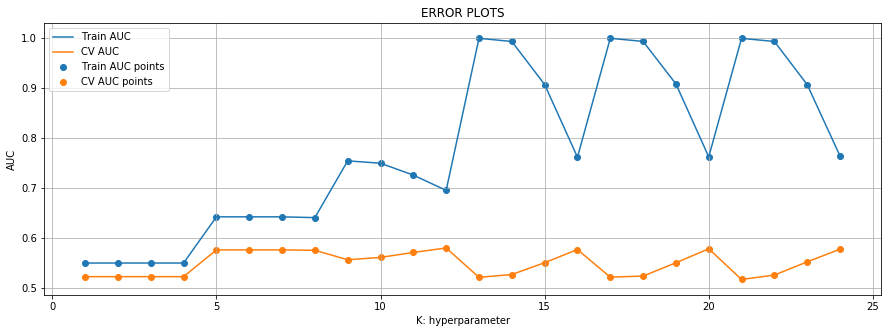

In [81]:

BestDS( xtr3, xcv3, ytrain, ycv )

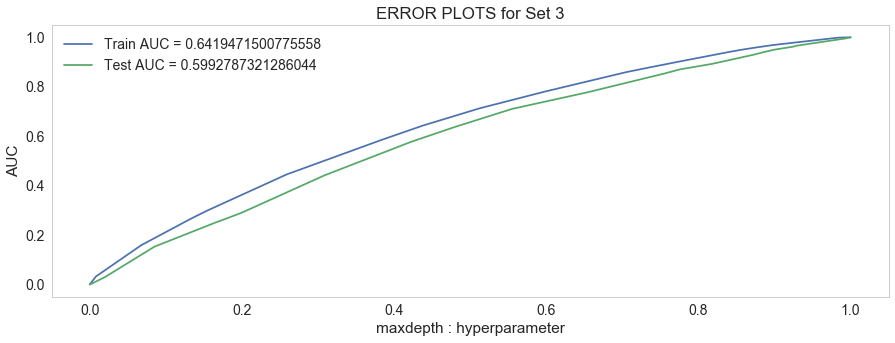

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.36147119086297624  for threshold =  0.86
[[ 2135  1328]
 [ 7878 11104]]


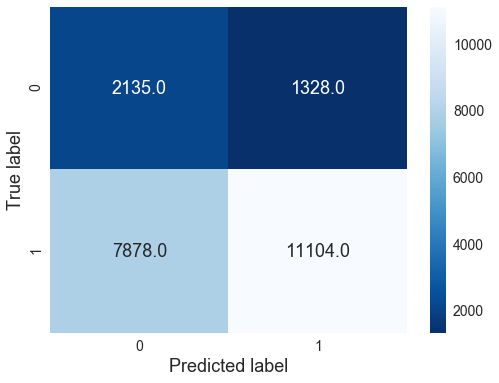



Confusion Matrix for Test Set  3
 The maximum value of tpr*(1-fpr) =  0.3334581777563155  for threshold =  0.86
[[1470 1076]
 [5895 8059]]


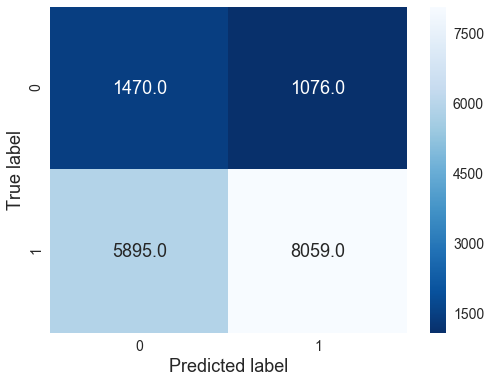

In [87]:
bestD = 5
bestS = 10
sns.set_style('whitegrid')

pred = roc( xtr3, xte3, ytrain, ytest, bestD, bestS, 3 )

### Operation on FP points

In [111]:
# Claculating indexes of False Positive points
ind = []
for i in range( 0, 330 ):
    
    if pred[i] == 0 and yte[i] == 1:
        
        ind.append(i)

In [112]:
print( ind )
len( ind )

[4, 8, 11, 13, 16, 18, 20, 30, 33, 36, 37, 41, 43, 45, 48, 49, 50, 54, 56, 68, 70, 77, 83, 84, 88, 93, 96, 98, 102, 103, 108, 110, 111, 113, 114, 117, 119, 121, 122, 125, 128, 133, 141, 143, 144, 146, 155, 157, 158, 159, 163, 164, 166, 167, 169, 172, 177, 178, 181, 184, 185, 187, 189, 192, 194, 196, 197, 198, 199, 204, 208, 210, 211, 217, 220, 226, 227, 228, 229, 230, 231, 232, 235, 242, 243, 244, 245, 248, 250, 261, 262, 264, 269, 272, 275, 276, 279, 281, 284, 286, 287, 292, 295, 298, 299, 300, 311, 312, 313, 314, 319, 327, 329]


113

In [113]:
price = []

for i in ind:
    price.append( donor['price'][i] )

In [114]:
print( price )
len( price )

[67.98, 241.98, 431.77, 399.99, 298.43, 59.98, 213.85, 4.99, 401.09, 217.99, 326.59, 224.31, 390.33, 183.95, 416.99, 554.87, 508.98, 67.97, 189.03, 433.76, 260.02, 147.32, 227.99, 484.14, 119.99, 554.33, 353.65, 210.94, 1521.97, 51.2, 269.63, 158.35, 401.96, 443.63, 188.83, 499.99, 103.66, 8.72, 130.98, 387.61, 143.96, 225.13, 31.47, 878.39, 20.56, 60.49, 104.96, 24.99, 201.63, 63.81, 119.99, 318.97, 157.45, 624.99, 148.58, 293.09, 178.73, 261.61, 27.49, 1152.84, 329.95, 839.85, 157.0, 5.88, 483.99, 1526.33, 379.0, 404.87, 282.54, 131.03, 41.97, 467.19, 79.98, 957.85, 864.31, 93.46, 20.31, 33.98, 229.99, 177.74, 209.97, 542.2, 438.94, 118.76, 189.0, 42.6, 141.13, 233.43, 382.46, 40.45, 1299.0, 466.86, 32.48, 107.96, 335.97, 33.95, 110.07, 19.11, 938.96, 81.89, 538.6, 189.79, 10.88, 10.46, 64.47, 6.79, 344.5, 214.12, 283.66, 173.01, 434.05, 162.35, 388.95]


113

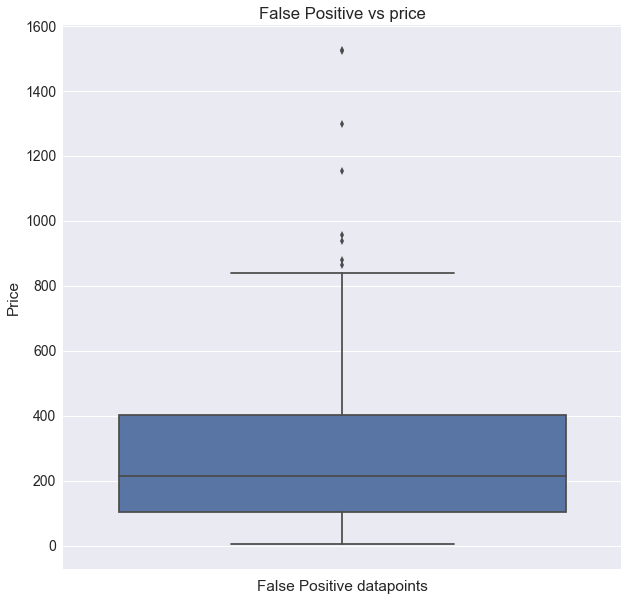

In [115]:
import seaborn as sns

plt.figure( figsize =(10,10) )
#plt.plot( ind, price )
sns.boxplot( y = price )
plt.xlabel('False Positive datapoints')
plt.ylabel('Price')
plt.title('False Positive vs price')
plt.show()

In [116]:
prev = []

for i in ind:
    prev.append( donor['teacher_number_of_previously_posted_projects'][i] )

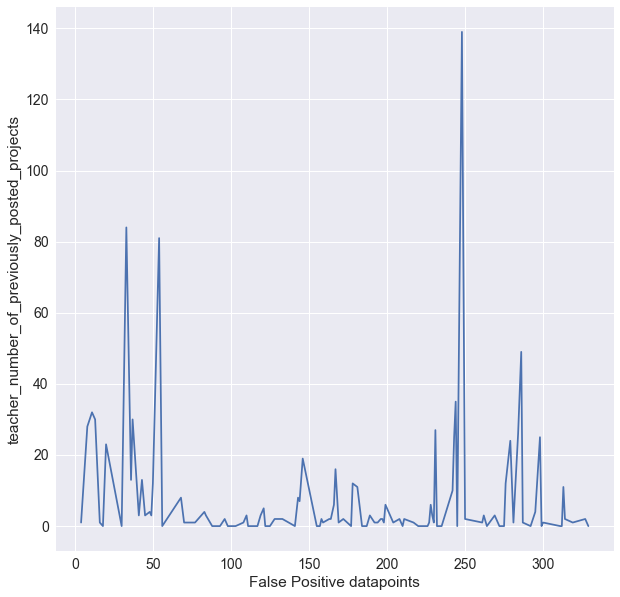

In [117]:
plt.figure( figsize =(10,10) )

plt.plot( ind, prev )

plt.xlabel('False Positive datapoints')
plt.ylabel('teacher_number_of_previously_posted_projects')

plt.show()

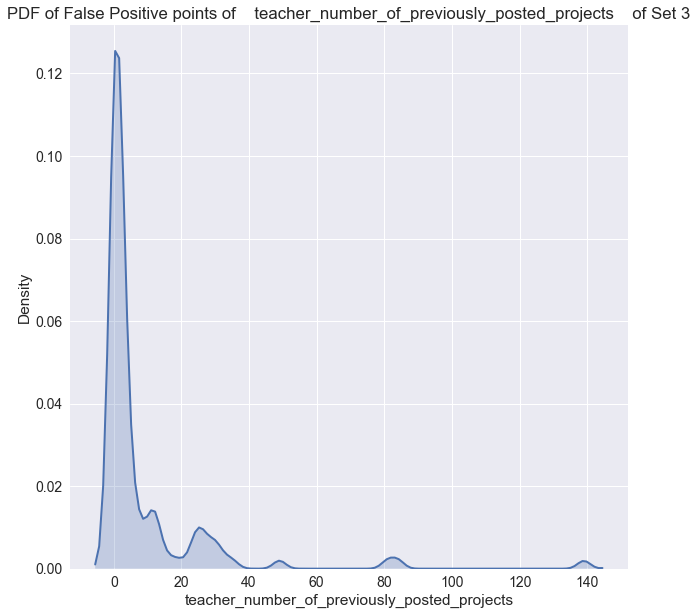

In [118]:
#sns.FacetGrid( donor, size = 5 ).map( sns.distplot, prev ).add_legend()

plt.figure( figsize =(10,10) )

sns.distplot( prev, hist = False, kde = True, kde_kws ={ 'linewidth' : 2, 'shade' : True } )

plt.title('PDF of False Positive points of    teacher_number_of_previously_posted_projects    of Set 3')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.show()

### wordcloud for EssayText of FP pts.

In [119]:
essay = ""
for i in ind:
    temp = donor['cleanEssay'][i]
    essay += temp

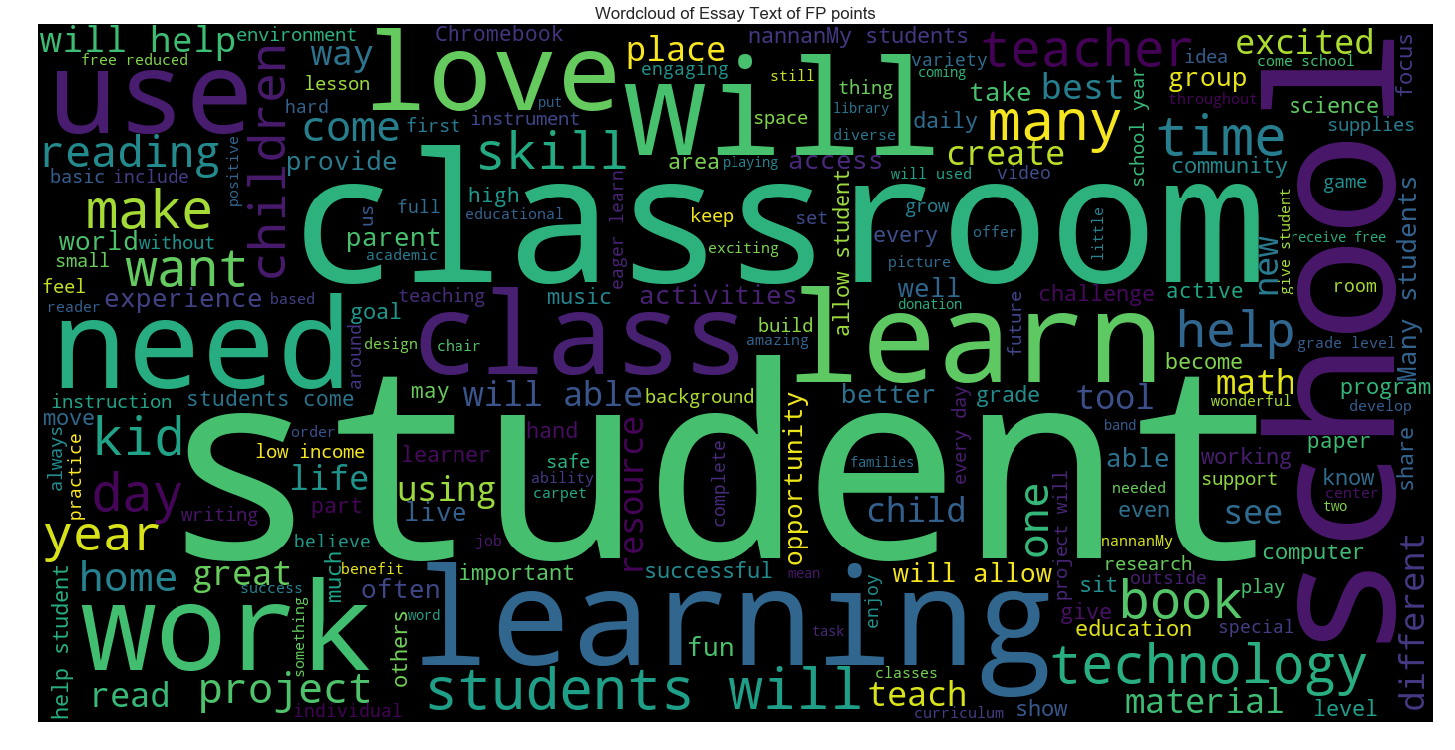

In [120]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color='black', width=1400, height=700 ).generate( essay )

# Display the generated image:
fig = plt.figure( figsize=(25,20) )
plt.imshow( wordcloud )
plt.title('Wordcloud of Essay Text of FP points')
plt.axis('off')
plt.show()


## Operation on Set 4

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

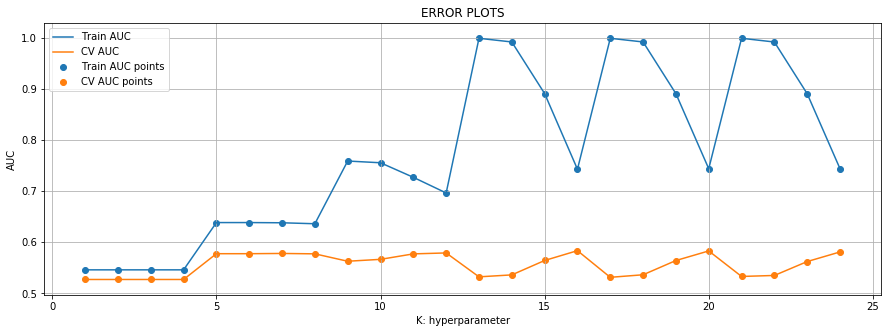

In [82]:
BestDS( xtr4, xcv4, ytrain, ycv )

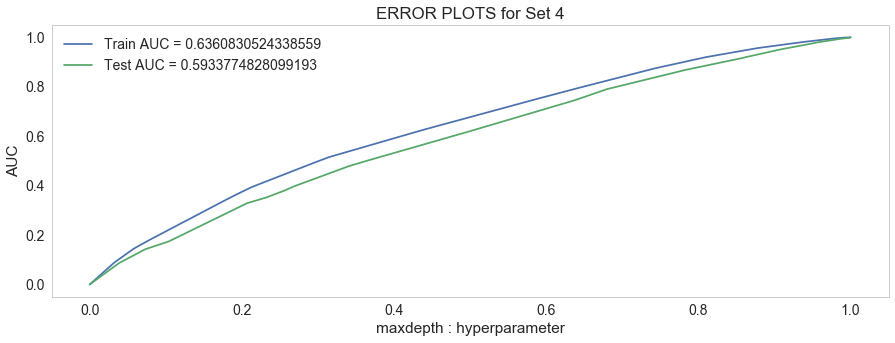

Confusion Matrix for Train of Set  4
 The maximum value of tpr*(1-fpr) =  0.3532758194892175  for threshold =  0.83
[[ 1945  1518]
 [ 7103 11879]]


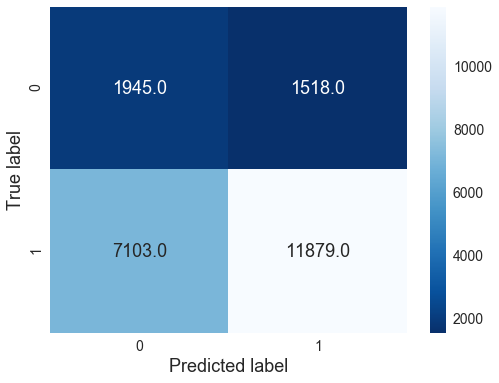



Confusion Matrix for Test Set  4
 The maximum value of tpr*(1-fpr) =  0.3182851893231053  for threshold =  0.83
[[1274 1272]
 [5300 8654]]


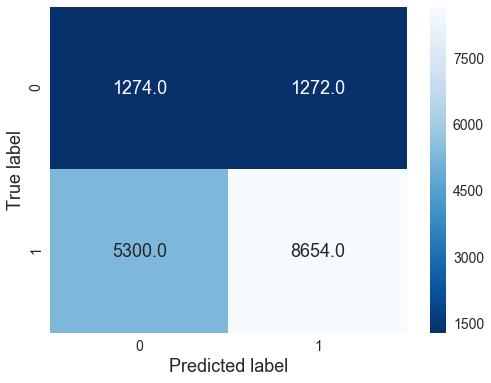

In [88]:
bestD = 5
bestS = 500
sns.set_style('whitegrid')

pred = roc( xtr4, xte4, ytrain, ytest, bestD, bestS, 4 )

### Operations on FP points

In [126]:
# Claculating indexes of False Positive points
ind = []
for i in range( 0, 330 ):
    
    if pred[i] == 0 and yte[i] == 1:
        
        ind.append(i)

In [127]:
print( ind )
len( ind )

[1, 5, 8, 9, 13, 18, 24, 25, 29, 32, 33, 39, 41, 43, 48, 49, 54, 56, 63, 67, 68, 70, 71, 72, 75, 77, 79, 91, 93, 96, 98, 102, 103, 106, 107, 108, 110, 111, 112, 114, 115, 117, 119, 122, 123, 125, 126, 127, 128, 129, 131, 134, 135, 136, 137, 143, 144, 146, 152, 153, 155, 157, 158, 163, 164, 165, 167, 172, 178, 181, 184, 185, 187, 188, 189, 194, 195, 196, 197, 198, 199, 208, 212, 213, 217, 220, 222, 226, 227, 229, 230, 231, 232, 235, 236, 238, 242, 243, 245, 248, 261, 263, 267, 270, 277, 278, 281, 285, 287, 288, 290, 291, 292, 298, 299, 300, 303, 307, 308, 313, 315, 322, 324, 327]


124

In [128]:
price = []

for i in ind:
    price.append( donor['price'][i] )

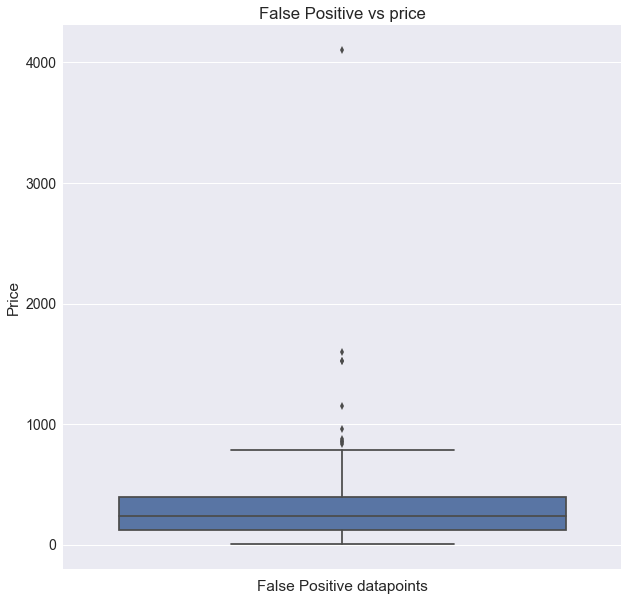

In [129]:
import seaborn as sns

plt.figure( figsize =(10,10) )
#plt.plot( ind, price )
sns.boxplot( y = price )
plt.xlabel('False Positive datapoints')
plt.ylabel('Price')
plt.title('False Positive vs price')
plt.show()

In [130]:
prev = []

for i in ind:
    prev.append( donor['teacher_number_of_previously_posted_projects'][i] )

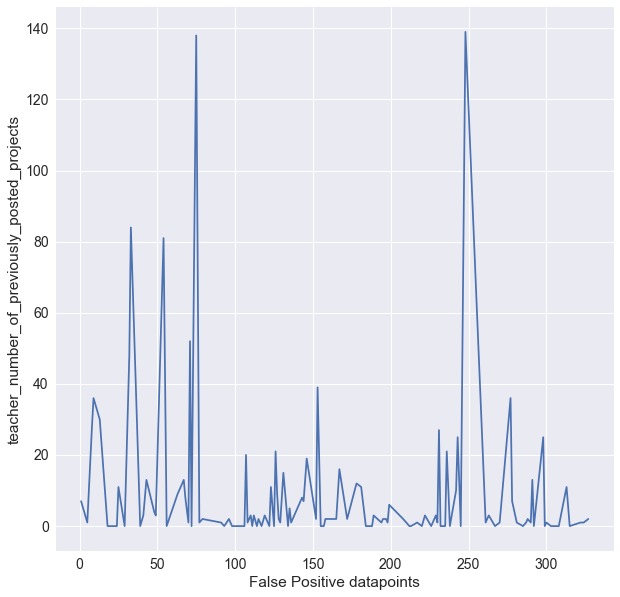

In [131]:
plt.figure( figsize =(10,10) )

plt.plot( ind, prev )

plt.xlabel('False Positive datapoints')
plt.ylabel('teacher_number_of_previously_posted_projects')

plt.show()

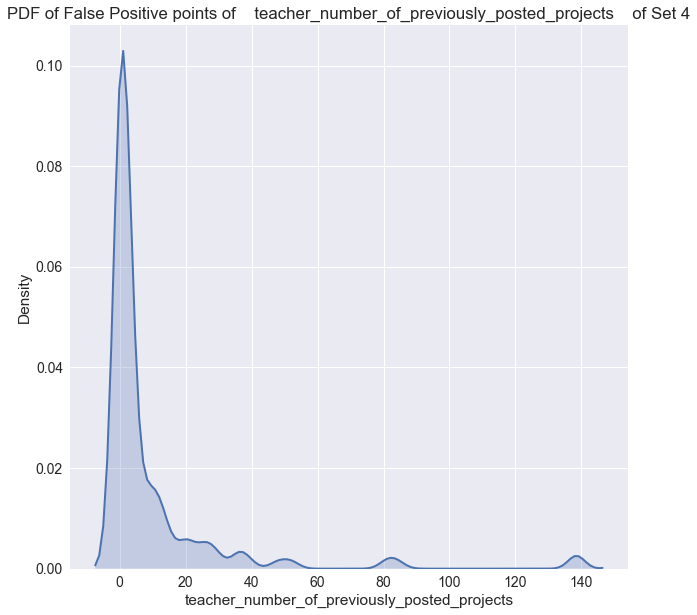

In [132]:
plt.figure( figsize =(10,10) )

sns.distplot( prev, hist = False, kde = True, kde_kws ={ 'linewidth' : 2, 'shade' : True } )

plt.title('PDF of False Positive points of    teacher_number_of_previously_posted_projects    of Set 4')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.show()

### wordcloud for EssayText of FP pts.

In [133]:
essay = ""
for i in ind:
    temp = donor['cleanEssay'][i]
    essay += temp

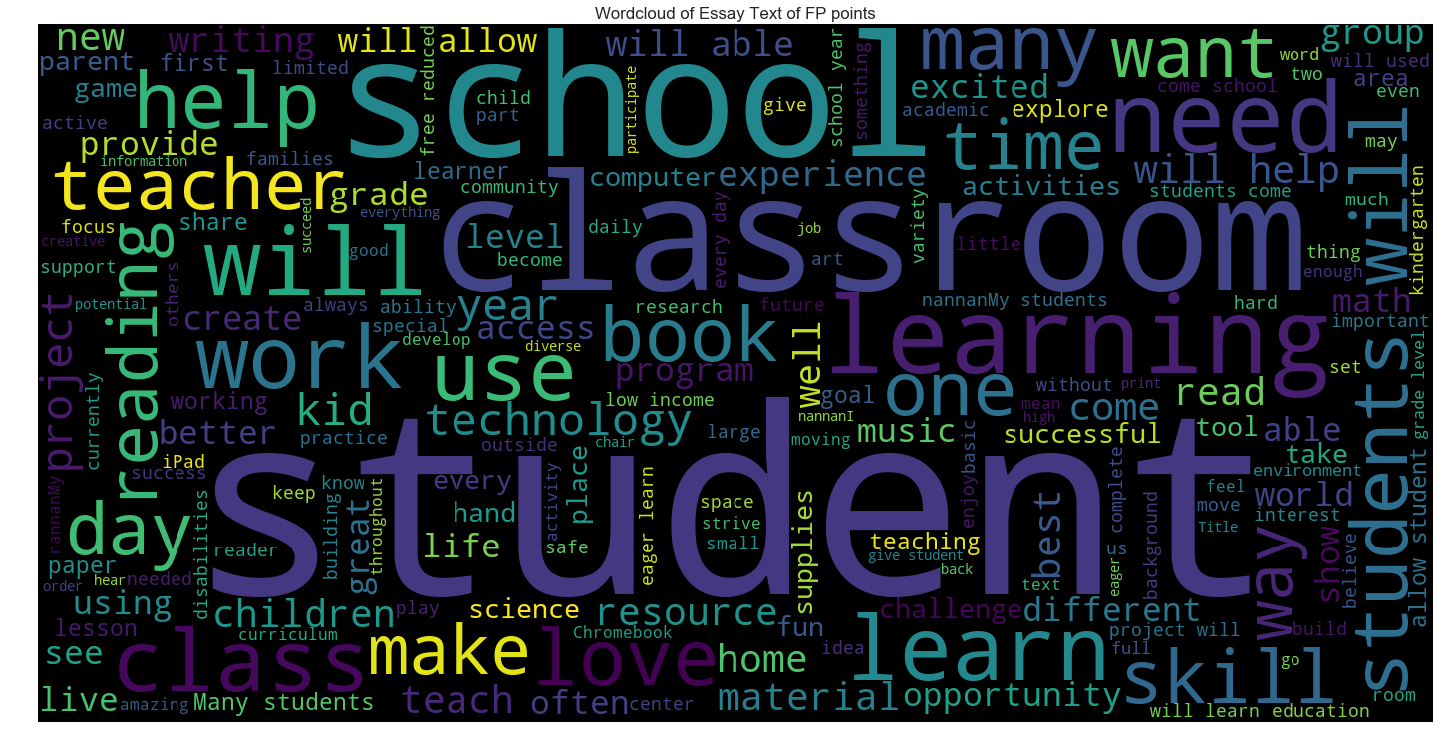

In [134]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color='black', width=1400, height=700 ).generate( essay )

# Display the generated image:
fig = plt.figure( figsize=(25,20) )
plt.imshow( wordcloud )
plt.title('Wordcloud of Essay Text of FP points')
plt.axis('off')
plt.show()


## Task 2

### Selecting Top 3K features from Set 2 and applying Operations

In [89]:
classifier = DecisionTreeClassifier()

classifier.fit( xtr2, ytrain )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
print( len(classifier.feature_importances_) )

classifier.feature_importances_

# Return the feature importances. Computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.

8356


array([0.00032956, 0.        , 0.00059912, ..., 0.        , 0.00254546,
       0.        ])

In [91]:
# Understanding argsort()

temp = np.array([3, 1, 2, 4, 0])  
np.argsort(temp)

# argsort() : Returns an array that contains indices that will sort the array 
# i,e; index(4) = 0  index(1) = 1  index(2) = 2  index(0) = 3  index(3) = 4    => sorted array  0 1 2 3 4

array([4, 1, 2, 0, 3], dtype=int64)

In [92]:
classifier.feature_importances_.argsort()  # Sorted as low importance -> High importance

array([4177, 5373, 5371, ..., 6475, 4432, 4155], dtype=int64)

In [93]:
classifier.feature_importances_.argsort()[::-1]   # We reverse it 

# Now the top index corresponding to xtr2 dataframe are top features

array([4155, 4432, 6475, ..., 5371, 5373, 4177], dtype=int64)

In [94]:
print( classifier.feature_importances_.argsort()[::-1][:3000] ) # Selecting top 3k features

len( classifier.feature_importances_.argsort()[::-1][:3000] ) 

[4155 4432 6475 ...  811  808 1362]


3000

In [95]:
xtr2Top3k = xtr2[ :, classifier.feature_importances_.argsort()[::-1] [:3000] ]  # select all rows and only top 3k cols.

xtr2Top3k.shape

(22445, 3000)

In [96]:
xte2Top3k = xte2[ :, classifier.feature_importances_.argsort()[::-1] [:3000] ]

xte2Top3k.shape

(16500, 3000)

In [97]:
xcv2Top3k = xcv2[ :, classifier.feature_importances_.argsort()[::-1] [:3000] ]

xcv2Top3k.shape

(11055, 3000)

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

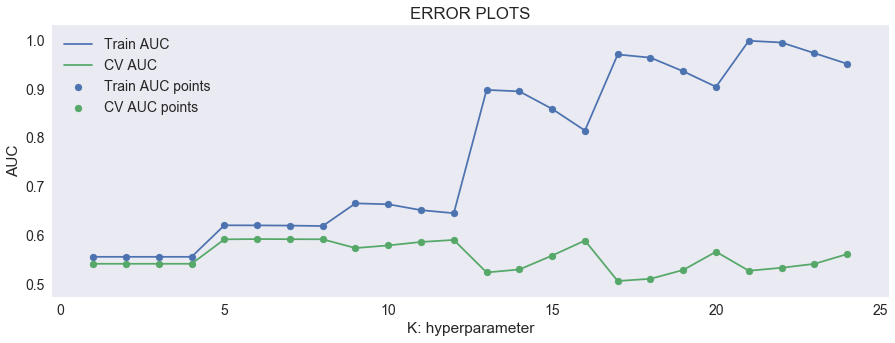

In [98]:
BestDS( xtr2Top3k, xcv2Top3k, ytrain, ycv)

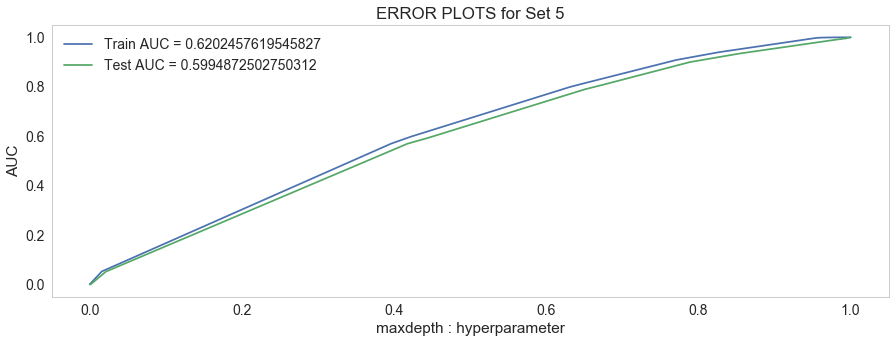

Confusion Matrix for Train of Set  5
 The maximum value of tpr*(1-fpr) =  0.34566236329549455  for threshold =  0.882
[[ 2091  1372]
 [ 8162 10820]]


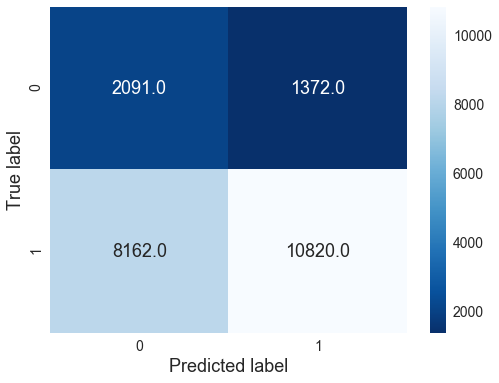



Confusion Matrix for Test Set  5
 The maximum value of tpr*(1-fpr) =  0.33173190758863064  for threshold =  0.856
[[1411 1135]
 [5662 8292]]


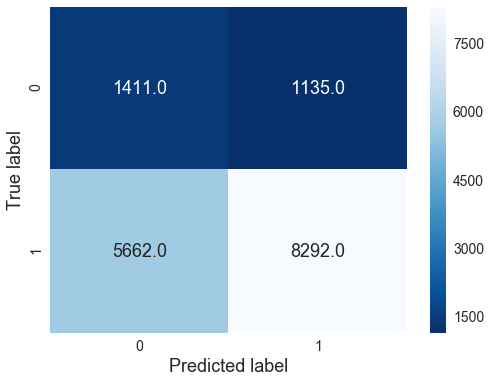

In [99]:
bestD = 5
bestS = 5
sns.set_style('whitegrid')

pred = roc( xtr2Top3k, xte2Top3k, ytrain, ytest, bestD, bestS, 5 )

### Opeartions on FP points

In [151]:
# Claculating indexes of False Positive points
ind = []
for i in range( 0, 330 ):
    
    if pred[i] == 0 and yte[i] == 1:
        
        ind.append(i)

In [152]:
print( ind )
len( ind )

[2, 8, 9, 13, 14, 18, 19, 20, 24, 30, 33, 39, 45, 48, 49, 70, 75, 86, 88, 92, 98, 99, 100, 101, 102, 103, 109, 111, 114, 118, 121, 125, 126, 128, 132, 138, 141, 144, 146, 153, 156, 159, 166, 169, 172, 173, 175, 177, 181, 188, 192, 194, 202, 204, 207, 208, 215, 217, 219, 224, 227, 229, 236, 242, 243, 244, 245, 252, 262, 266, 269, 272, 274, 275, 276, 278, 280, 281, 286, 287, 290, 292, 298, 300, 304, 307, 308, 310, 312, 313, 316, 318, 325, 327]


94

In [153]:
price = []

for i in ind:
    price.append( donor['price'][i] )

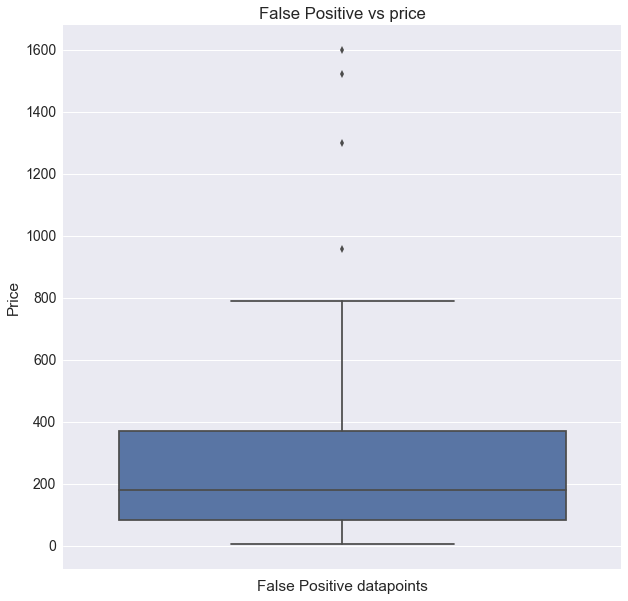

In [154]:
import seaborn as sns

plt.figure( figsize =(10,10) )
#plt.plot( ind, price )
sns.boxplot( y = price )
plt.xlabel('False Positive datapoints')
plt.ylabel('Price')
plt.title('False Positive vs price')
plt.show()

In [155]:
prev = []

for i in ind:
    prev.append( donor['teacher_number_of_previously_posted_projects'][i] )

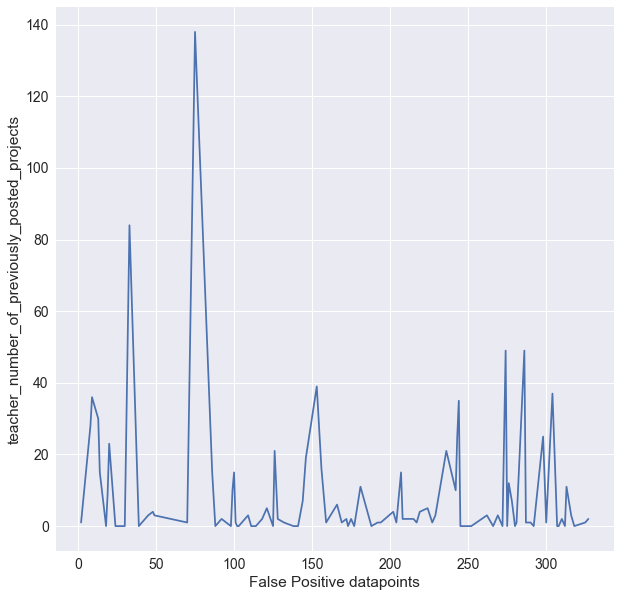

In [156]:
plt.figure( figsize =(10,10) )

plt.plot( ind, prev )

plt.xlabel('False Positive datapoints')
plt.ylabel('teacher_number_of_previously_posted_projects')

plt.show()

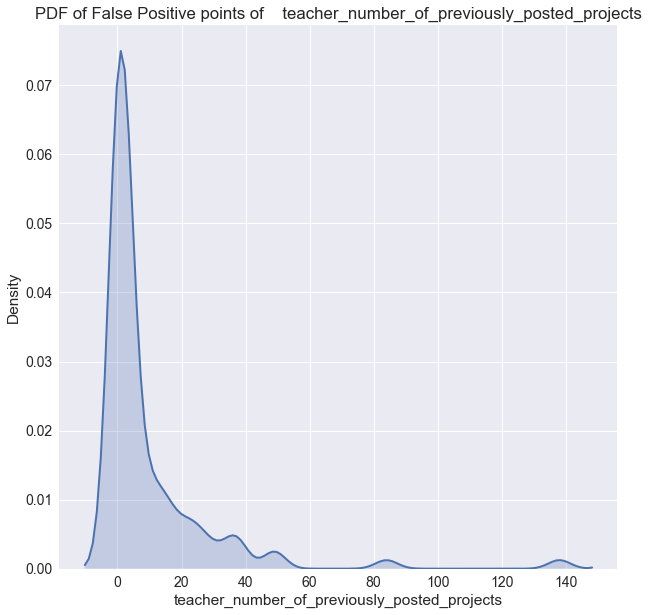

In [157]:
plt.figure( figsize =(10,10) )

sns.distplot( prev, hist = False, kde = True, kde_kws ={ 'linewidth' : 2, 'shade' : True } )

plt.title('PDF of False Positive points of    teacher_number_of_previously_posted_projects')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.show()

### creating wordcloud of Essay text of FP pts 

In [158]:
essay = ""
for i in ind:
    temp = donor['cleanEssay'][i]
    essay += temp

In [159]:
print(essay[20: 200])
len(essay)

't always the ones that win, but those with the most guts." By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for t


144992

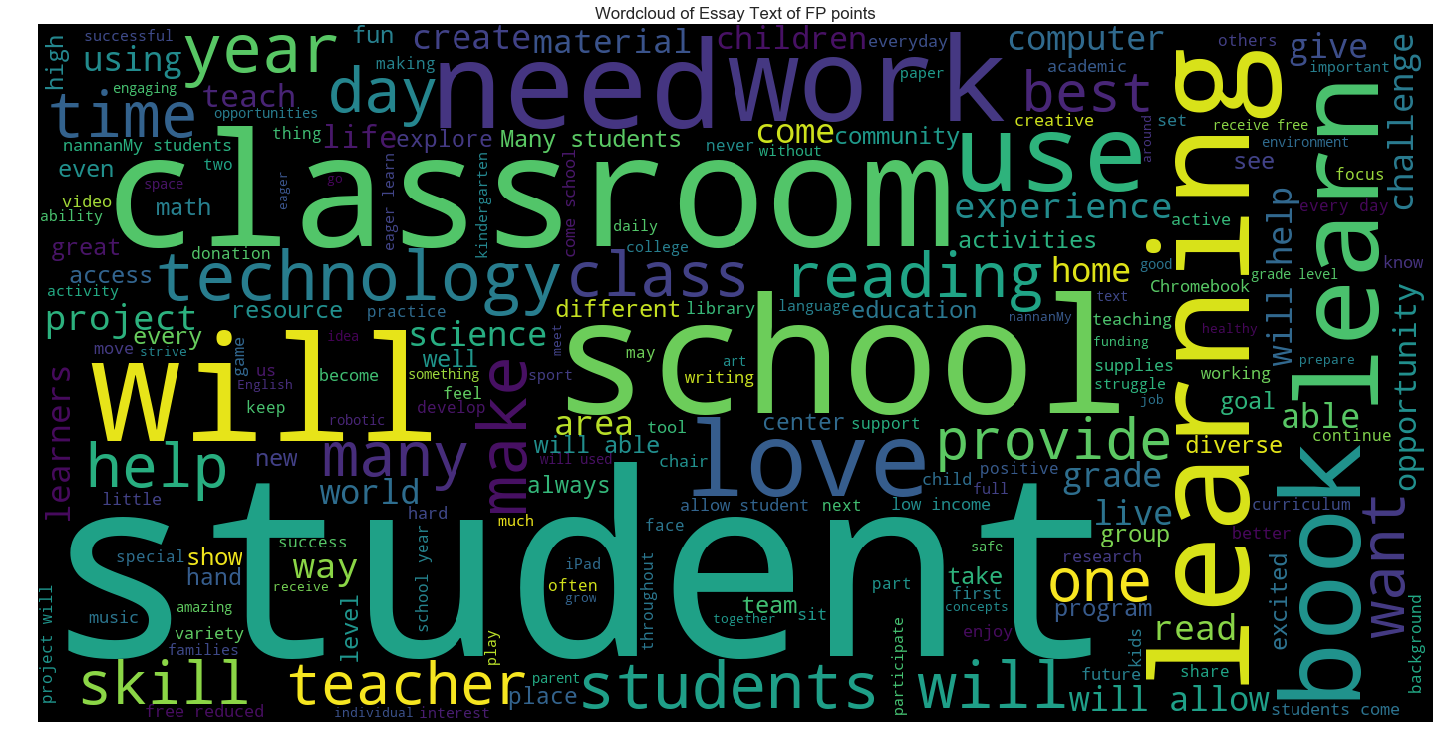

In [160]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color='black', width=1400, height=700 ).generate( essay )

# Display the generated image:
fig = plt.figure( figsize=(25,20) )
plt.imshow( wordcloud )
plt.title('Wordcloud of Essay Text of FP points')
plt.axis('off')
plt.show()


### Getting Feature names for Graphviz

In [161]:
x = [ tfidfvect, Titletfidfvect, vectState, vectPrefix, vectCat, vectSubCat, vectGCat ]

feat = []

for v in tqdm(x):
    
    feat += v.get_feature_names()
    
print( feat[0: 100] )

feat.append('price')
feat.append('quantity')
feat.append('teacher_number_of_previously_posted_projects')

len( feat )

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 874.85it/s]


['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12', '120', '125', '12th', '13', '130', '14', '140', '15', '150', '16', '160', '17', '18', '180', '19', '1st', '20', '200', '2000', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20th', '21', '21st', '22', '23', '24', '25', '250', '26', '27', '28', '29', '2d', '2nd', '30', '300', '31', '32', '33', '34', '35', '350', '36', '360', '37', '38', '3d', '3doodler', '3rd', '40', '400', '41', '42', '43', '44', '45', '450', '46', '47', '48', '49', '4k', '4th', '50', '500', '504', '51', '52', '53', '54', '55', '550', '56', '57', '58', '5th', '60', '600', '62', '64', '65', '650', '66', '67']


8432

In [162]:
ind = list( classifier.feature_importances_.argsort()[::-1][:3000] )

len( ind )

3000

In [163]:
featTop = []

for i in range( 0, len(feat) ) :
    
    if i in ind:
        
        temp = feat[i]
        featTop.append( temp )

In [164]:
print( featTop[100: 130] )
len( featTop )

['69', '6th', '70', '700', '71', '72', '74', '75', '750', '76', '77', '78', '7th', '80', '800', '81', '82', '83', '84', '85', '850', '86', '87', '88', '89', '8th', '90', '900', '91', '92']


3000

In [165]:
from sklearn import tree
import graphviz 


classifier = tree.DecisionTreeClassifier( max_depth = 3, min_samples_split = 500 )
classifier = classifier.fit( xtr2Top3k, ytrain )

dot_data = tree.export_graphviz( classifier, out_file=None ) 
graph = graphviz.Source( dot_data ) 
graph.render("xtr5") 

'xtr5.pdf'

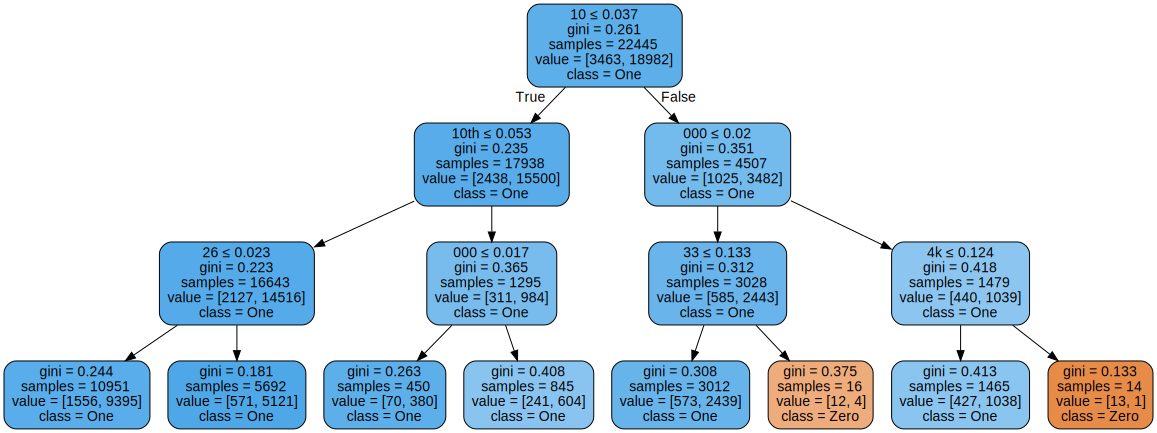

In [166]:
dot_data = tree.export_graphviz( classifier, out_file=None, feature_names = featTop ,  class_names=['Zero', 'One'],
                                filled=True, rounded=True,  special_characters=True )  

# feature_names : All feature names in the dataset provided i,e; xtr1 here ( BOW ) 
# class_names : Must be str not int ( these are label names )
graph = graphviz.Source(dot_data)  

graph 

In [168]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Set "," Vectorizer ", " Best Depth ", " Best Split ", " Train AUC ", " Test AUC "]

x.add_row( [ " Set 1 ", " B.O.W ", " 10 ", " 500 ", " 0.6514 ", " 0.6015 " ] ) 
x.add_row( [ " Set 2 ", " TFIDF ", " 5 ", " 100 ", " 0.6277 ", " 0.5957 " ] )
x.add_row( [ " Set 3 ", " Avg W2V ", " 5 ", " 10 ", " 0.6299 ", " 0.5799 " ] )
x.add_row( [ " Set 4 ", " WW2V ", " 5 ", " 500 ", " 0.6284 ", " 0.5861 " ] )
x.add_row( [ " Set 5 ", " TFIDF ", " 5 ", " 5 ", " 0.6282 ", " 0.5964 " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+---------+--------------+--------------+--------------+-------------+------------+
|   Set   |  Vectorizer  |  Best Depth  |  Best Split  |  Train AUC  |  Test AUC  |
+---------+--------------+--------------+--------------+-------------+------------+
|  Set 1  |    B.O.W     |      10      |     500      |    0.6514   |   0.6015   |
|  Set 2  |    TFIDF     |      5       |     100      |    0.6277   |   0.5957   |
|  Set 3  |   Avg W2V    |      5       |      10      |    0.6299   |   0.5799   |
|  Set 4  |     WW2V     |      5       |     500      |    0.6284   |   0.5861   |
|  Set 5  |    TFIDF     |      5       |      5       |    0.6282   |   0.5964   |
+---------+--------------+--------------+--------------+-------------+------------+


## Conclusions


Bag of Words gives maximum Train AUC

TFIDF on Set 2 and Set 5 are almost the same

Amongst all the models Bag of Words on set 2 gives maximum Test AUC